### PatternCount(text,pattern)

In [1]:
# text 인덱스의 0~ 29-5+1 까지의 pattern 일치 여부를 검사한다.
# text에서 pattern 찾기 -> range(len(text)-len(pattern) +1) 로 설정
def PatternCount(text, pattern):
    count = 0
    for i in range(len(text)-len(pattern)+1):
        if text[i:i+len(pattern)] == pattern:
            count+=1
    return count        

In [2]:
text = 'ACAACTATGCATACTATCGGGAACTATCCT'
pattern = 'ACTAT'
PatternCount(text, pattern)

3

### FrequentWords(text,k)

In [3]:
# text에서 가장 많이 나타난 k-mer
def FrequentWords(text,k):
    FrequentPatterns = []
    count_dict = dict()
    for i in range(len(text)-k+1):
        pattern = text[i:i+k]
        count = PatternCount(text, pattern)
        count_dict[pattern] = count
    maxcount = max(count_dict.keys())
    return maxcount

FrequentWords(text,5)

'TGCAT'

FrequentWords는 효율이 떨어진다.

PatternCount(text, pattern) 함수 호출 시 kmer 검색 인덱스는 0, 1 ,... , len(text)-k 까지이며 각각 인덱스의 kmer들을 k번만큼 검사를 한다.

즉 PatternCount에서 검사는 (len(text)-k+1) * k 번 일어난다. 

FrequentWords의 pattern은 len(text)-k+1개이다. 즉 패턴별로 더 일어나므로 (len(text)-k+1)^2 * k 번 일어난다.

FrequentWords의 계산시간 상한선은 len(text)^2 * k 라고 말하며 시간 복잡도를 O(len(text)^2 *k)라고 한다.


9-mer 'ATCATCAAG' 는 Vibrio cholerae의 ori(복제원점)에서 세번 나타난다. 그 확률은 1/1300

ori에서는 네 가지의 9-mer들이 3회 이상 반복된다.

즉 여기는 원핵생물 복제기점인 DnaA 결합자리의 후보가 된다.

In [4]:
Vibrio_cholerae_ori = 'atcaatgatcaacgtaagcttctaagcatgatcaaggtgctcacacagtttatccacaacctgagtggatgacatcaagataggtcgttgtatctccttcctctcgtactctcatgaccacggaaagatgatcaagagaggatgatttcttggccatatcgcaatgaatacttgtgacttgtgcttccaattgacatcttcagcgccatattgcgctggccaaggtgacggagcgggattacgaaagcatgatcatggctgttgttctgtttatcttgttttgactgagacttgttaggatagacggtttttcatcactgactagccaaagccttactctgcctgacatcgaccgtaaattgataatgaatttacatgcttccgcgacgatttacctcttgatcatcgatccgattgaagatcttcaattgttaattctcttgcctcgactcatagccatgatgagctcttgatcatgtttccttaaccctctattttttacggaagaatgatcaagctgctgctcttgatcatcgtttc'
PatternCount(Vibrio_cholerae_ori,'atgatcaag')

3

### get_kmer(text,k)

In [5]:
def get_Kmer(text, k):
    count_dict = dict()
    for i in range(len(text)-k+1):
        pattern = text[i:i+k]
        count = PatternCount(text, pattern)
        if count >2:
            count_dict[pattern] = count
    return count_dict

In [6]:
# k-mer count and list pattern existing more than 3
text = Vibrio_cholerae_ori
k = 9
get_Kmer(text, k)

{'atgatcaag': 3, 'ctcttgatc': 3, 'tcttgatca': 3, 'cttgatcat': 3}

9-mer 'ATCATCAAG'는 역상보 서열인 'CTTGATGAT'를 포함하여 총 여섯번 발견된다.

이 발견은 이 서열이 DnaA box 일 것이다는 가설로 이끈다.

ori 영역 뿐 아니라 유전체 전체에 걸쳐 반복되는 문자열일 수도 있으므로 문제를 해결해야한다.

### find_RCseq(seq)

In [7]:
# 역상보 서열 함수
def find_RCseq(seq):
    seq = seq.replace('a','0').replace('g','1').replace('c','2').replace('t','3')
    seq = seq.replace('0','t').replace('1','c').replace('2','g').replace('3','a')
    return seq[::-1]

find_RCseq('atcatcaag')

'cttgatgat'

### get_patternIdx(text, pattern)

In [8]:
# 패턴, 유전체서열(text) 입력받아 패턴의 인덱스 리턴하는 함수
def get_patternIdx(text, pattern):
    idx_list = list()
    for i in range(len(text)-len(pattern)+1):
        if text[i:i+len(pattern)] == pattern:
            idx_list.append(i)

    return idx_list
get_patternIdx(text, pattern)

[]

Vibrio Cholerae의 유전체에서 'ATGATCAAG'의 인덱스를 구하면 150000 번째 근처 인덱스를 제외한 나머지는 작은 영역에서 가까이 나타나지 않는다.

즉 150000 번째 근처 인덱스에서 이 서열이 DnaA box일 것이라는 가설을 지지한다.

그러나 이 서열이 복제와 상관없이 우연히 발생한 것일 가능성이 있다. 또한 다른 박테리아는 다른 DnaA box를 가질 수 있다.


In [9]:
# Vibrio Cholerae 유전체
text = open('DATA/Vibrio_Cholerae_genome.txt')
text = text.readlines()
text[0]

'ACAATGAGGTCACTATGTTCGAGCTCTTCAAACCGGCTGCGCATACGCAGCGGCTGCCATCCGATAAGGTGGACAGCGTCTATTCACGCCTTCGTTGGCAACTTTTCATCGGTATTTTTGTTGGCTATGCAGGCTACTATTTGGTTCGTAAGAACTTTAGCTTGGCAATGCCTTACCTGATTGAACAAGGCTTTAGTCGTGGCGATCTGGGTGTGGCTCTCGGTGCGGTTTCAATCGCGTATGGTCTGTCTAAATTTTTGATGGGGAACGTCTCTGACCGTTCTAACCCGCGCTACTTTCTGAGTGCAGGTCTACTCCTTTCGGCACTAGTGATGTTCTGCTTCGGCTTTATGCCATGGGCAACGGGCAGCATTACTGCGATGTTTATTCTGCTGTTCTTAAACGGCTGGTTCCAAGGCATGGGTTGGCCTGCTTGTGGCCGTACTATGGTGCACTGGTGGTCACGCAAAGAGCGTGGTGAGATTGTTTCGGTCTGGAACGTCGCTCACAACGTCGGTGGTGGTTTGATTGGCCCCATTTTCCTGCTCGGCCTATGGATGTTTAACGATGATTGGCGCACGGCCTTCTATGTCCCCGCTTTCTTTGCGGTGCTGGTTGCCGTATTTACTTGGCTAGTCATGCGCGATACTCCTCAATCTTGTGGTTTACCACCGATTGAAGAGTACAAAAACGACTATCCCGATGATTACGATAAGTCGCATGAAAATGAGATGACTGCGAAAGAGATCTTCTTTAAGTATGTCTTCAACAACAAACTGCTTTGGTCGATTGCGATTGCTAACGCCTTCGTTTACCTGATCCGCTACGGTGTACTTGACTGGGCTCCGGTTTACCTCAAAGAAGCCAAACACTTCACGGTTGATAAATCTTCTTGGGCTTACTTCCTGTACGAGTGGGCGGGCATTCCGGGTACTTTGTTGTGTGGTTGGATTTCCGACAAAGTGTTTAAAGGCCGCCGCGCTCCAGCAGGCATCCTGT

In [10]:
# Vibrio Cholerae 유전체 패턴 인덱스
pattern = 'ATGATCAAG'
pattern_idx = get_patternIdx(text[0], pattern)
pattern_idx

[116556,
 149355,
 151913,
 152013,
 152394,
 186189,
 194276,
 200076,
 224527,
 307692,
 479770,
 610980,
 653338,
 679985,
 768828,
 878903,
 985368]

In [11]:
# Vibrio cholerae ori 내의 서열의 인덱스
get_patternIdx(Vibrio_cholerae_ori, 'atgatcaag')

[27, 127, 508]

매우 더운 환경에서 서식하는 박테리아 Thermotoga petrophilla의 ori 영역을 보면 ATGATCAAG 서열이 없다.

이 박테리아는 3번이상 나타나는 9-mer가 6개가 존재한다.

복제기점을 찾아주는 프로그램인 ori-finder를 사용하면 CCTACCACC와 그 역상보 서열이 DnaA box인 것을 알 수 있다. 

이 9-mer는 복제기점에서만 다섯번 나타난다.


In [12]:
Thermotoga_petrophila_ori = 'aactctatacctcctttttgtcgaatttgtgtgatttatagagaaaatcttattaactgaaactaaaatggtaggtttggtggtaggttttgtgtacattttgtagtatctgatttttaattacataccgtatattgtattaaattgacgaacaattgcatggaattgaatatatgcaaaacaaacctaccaccaaactctgtattgaccattttaggacaacttcagggtggtaggtttctgaagctctcatcaatagactattttagtctttacaaacaatattaccgttcagattcaagattctacaacgctgttttaatgggcgttgcagaaaacttaccacctaaaatccagtatccaagccgatttcagagaaacctaccacttacctaccacttacctaccacccgggtggtaagttgcagacattattaaaaacctcatcagaagcttgttcaaaaatttcaatactcgaaacctaccacctgcgtcccctattatttactactactaataatagcagtataattgatctga'

In [13]:
Pattern = 'atcatcaag'
text = Thermotoga_petrophila_ori
get_patternIdx(pattern, text)

[]

In [14]:
text = Thermotoga_petrophila_ori
k = 9
get_Kmer(Thermotoga_petrophila_ori, k)

{'tggtaggtt': 3,
 'ggtaggttt': 3,
 'aaacctacc': 3,
 'aacctacca': 3,
 'acctaccac': 5,
 'cctaccacc': 3}

In [15]:
# k-mer count and list pattern existing more than 3
count_dict = dict()
text = Thermotoga_petrophila_ori
k = 9
get_Kmer(text,k)


{'tggtaggtt': 3,
 'ggtaggttt': 3,
 'aaacctacc': 3,
 'aacctacca': 3,
 'acctaccac': 5,
 'cctaccacc': 3}

만약 새롭게 염기서열이 밝혀진 박테리아 유전체에서 ori를 찾는다고 생각하자.

이미 알려진 역상보 서열을가지고 찾는 것은 도움이 안된다.

대신 유전체 내에서 군집을 이루는 모든 k-mer을 찾을 수 있다.

길이 L인 윈도우를 만들어 유전체를 훑어 짧은 구간에서 k-mer가 여러번 나타나는 지 확인한다.

길이 L 에서 k-mer 패턴이 t번 나타나는 경우 (L,t)-군집을 형성한다고 한다.

이전 두 생물의 예시에서 Vibro cholerae는 (500,3)-군집 Thermotoga petrophilla는 (500,3)-군집

### get_clump(text, k, L, t)

In [16]:
# 유전체, k, L, t 를 입력받아 (L,t)-군집을 형성하는 모든 k-mer의 값
def get_clump(text, k, L, t):
    clump_list = list()
    for i in range(len(text)-L+1): 
        window = text[i:i+L]
        print(window)
        for j in range(len(window)-k+1):
            pattern = window[j:j+k]
            count = PatternCount(text, pattern)
            if count == t:
                clump_list.append(pattern)
            
    return list(set(clump_list))


In [17]:
len(Vibrio_cholerae_ori)

540

In [18]:
# 비브리오 콜레라균 ori의 window를 500으로 했을 때 3회 나오는 9-mer 
get_clump(Vibrio_cholerae_ori, 9, 500, 3)

atcaatgatcaacgtaagcttctaagcatgatcaaggtgctcacacagtttatccacaacctgagtggatgacatcaagataggtcgttgtatctccttcctctcgtactctcatgaccacggaaagatgatcaagagaggatgatttcttggccatatcgcaatgaatacttgtgacttgtgcttccaattgacatcttcagcgccatattgcgctggccaaggtgacggagcgggattacgaaagcatgatcatggctgttgttctgtttatcttgttttgactgagacttgttaggatagacggtttttcatcactgactagccaaagccttactctgcctgacatcgaccgtaaattgataatgaatttacatgcttccgcgacgatttacctcttgatcatcgatccgattgaagatcttcaattgttaattctcttgcctcgactcatagccatgatgagctcttgatcatgtttccttaaccctctatttttt
tcaatgatcaacgtaagcttctaagcatgatcaaggtgctcacacagtttatccacaacctgagtggatgacatcaagataggtcgttgtatctccttcctctcgtactctcatgaccacggaaagatgatcaagagaggatgatttcttggccatatcgcaatgaatacttgtgacttgtgcttccaattgacatcttcagcgccatattgcgctggccaaggtgacggagcgggattacgaaagcatgatcatggctgttgttctgtttatcttgttttgactgagacttgttaggatagacggtttttcatcactgactagccaaagccttactctgcctgacatcgaccgtaaattgataatgaatttacatgcttccgcgacgatttacctcttgatcatcgatccgattgaagatcttcaattgttaattctcttgcctcgactcatagccatgatgagctcttgatcatgtttccttaaccctctatttttt

['ctcttgatc', 'tcttgatca', 'cttgatcat', 'atgatcaag']

대장균 유전체의 ori의 100,000nt 크기의 조각 46개에서 Cytosin 비율을 계산했다.

ori to ter 방향이 5' to 3'인 가닥을 정방향 반가닥, ori to ter 방향이 5' to 3'과 반대면 역방향 반가닥이다.

한 strand에서 ter(복제말단)에서 부터 시작한 23개의 조각은 역방향 반가닥, ori에서 시작한 23개의 조각은 정방향 반가닥을 나타낸다.

역방향 반가닥의 경우 대부분 높은 C의 비율을 나타낸다. 반면 정방향 반가닥의 경우 낮은 C의 비율을 나타낸다.

반대로 정방향 반가닥의 경우 높은 G의 비율을 나타내는 반면 역방향 반가닥의 경우 낮은 G의 비율을 나타낸다.

이런 패턴이 우연의 일치가 아니라면 ori 위치를 찾는 단서가 될 수 있다.

복제 포크가 확장되면 DNA polymerase가 역방향 반가닥의 DNA를 복제하여 leading strand를 만든다. 

그러나 정방향 반가닥의 DNA를 복제한 lagging strand는 천천히 만들어진다. 즉 single strand로 존재하는 시간이 길다.

ssDNA로 존재하는 시간이 길 수록 돌연변이가 생길 확률이 높다. 

만약 ssDNA에서 4개 nt 중 하나가 더 많은 경향성을 가진다면 정방향 반가닥에서 이 nt 수가 줄어들었는 지 확인해야 한다.


Thermothoga petrophila의 nt 수를 보면 역방향 반가닥에서 높은 C가 정방향 반가닥에서 높은 G가 나타난다.

그러나 그 수의 차이를 보면 C는 11617만큼, G는 9973만큼 난다.

그 이유는 C의 탈아민화 때문인데 이는 T로 변하게 된다.

상대적으로 오래동안 ssDNA로 존재하는 정방향 반가닥은 C가 감소하는 경향을 보이고 T-G 미스매치를 형성한다.

그 결과로 이 DNA를 주형으로 하여 복제될 다음 DNA는 T-A 쌍으로 복제되어 변이가 발생할 수 있다.

즉 복제된 DNA의 역방향 반가닥은 G가 감소하게 된다.

따라서 처음 말한 역방향 반가닥에서 낮은 G가, 정방향 반가닥에서 높은 C가 일어나는 이유를 알 수 있다.

이 특징을 이용해 서열분석을 하여 G-C가 줄어들면 역방향, 커지면 정방향임을 알 수 있다.



### getSKEW(Genome)

In [19]:
# SKEW 값 구하기
def getSKEW(Genome):
    results=list()
    SKEW=0
    for i in range(len(Genome)):
        if Genome[i]=='G':
            SKEW +=1
        elif Genome[i]=='C':
            SKEW -=1
        results.append(SKEW)
    return results

Genome = 'CATGGGCATCGGCCATACGCC'
getSKEW(Genome)

[-1, -1, -1, 0, 1, 2, 1, 1, 1, 0, 1, 2, 1, 0, 0, 0, 0, -1, 0, -1, -2]

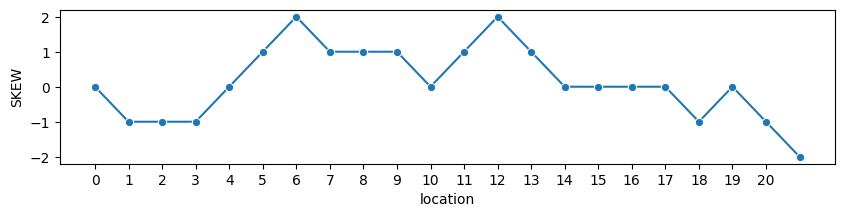

In [20]:
# SKEW 값 그래프
SKEW_dict = dict()
for i, SKEW in enumerate(getSKEW(Genome)):
    SKEW_dict[i+1] = SKEW

import matplotlib.pyplot as plt
import seaborn as sns

SKEW_dict[0]=0

plt.figure(figsize=(10,2))
plt.xlabel('location')
plt.ylabel('SKEW')
plt.xticks(list(range(21)))
plt.xticks(list(range(21)))
plt.yticks(list(range(-2,3)))
sns.lineplot(data=SKEW_dict, marker='o')
plt.show()

게놈의 5'to 3' 방향으로 ter에서 ori로 역방향 반가닥을 따라서 이동해보자.

ori에 도착할 때 까지 G-C(비대칭)가 감소한다. 그리고 ori에 도착하면 G-C(비대칭)가 증가한다.

즉 비대칭이 최소가 되는 지점이 ori이다.

In [21]:
# SKEW가 최소가 될때의 자리
def minSKEW(Genome):
    SKEW = getSKEW(Genome)
    print('getSKEW successed~')
    # min_SKEW = list(filter(lambda x: SKEW[x] == .min(SKEW), range(len(SKEW))))
    min_SKEW = SKEW.index(min(SKEW))
    return min_SKEW
minSKEW(Genome)

getSKEW successed~


20

이러한 방법으로 대장균의 ori 위치를 찾을 수 있다. 그러나 이 위치에서 9-mer는 발견되지 않는다.

In [22]:
E_coli_genome = open('DATA/E_coli.txt').readlines()[0]

In [23]:
# E.coli 게놈에서 SKEW가 최소가 될때의 자리
SKEW_min_idx = minSKEW(E_coli_genome)
SKEW_min_idx

getSKEW successed~


3923619

In [24]:
# E.coli ori에서 9-mer 구하기
E_coli_ori = 'aatgatgatgacgtcaaaaggatccggataaaacatggtgattgcctcgcataacgcggtatgaaaatggattgaagcccgggccgtggattctactcaactttgtcggcttgagaaagacctgggatcctgggtattaaaaagaagatctatttatttagagatctgttctattgtgatctcttattaggatcgcactgccctgtggataacaaggatccggcttttaagatcaacaacctggaaaggatcattaactgtgaatgatcggtgatcctggaccgtataagctgggatcagaatgaggggttatacacaactcaaaaactgaacaacagttgttctttggataactaccggttgatccaagcttcctgacagagttatccacagtagatcgcacgatctgtatacttatttgagtaaattaacccacgatcccagccattcttctgccggatcttccggaatgtcgtgatcaagaatgttgatcttcagtg'
text = E_coli_ori
k = 9
get_Kmer(text, 9)

{}

In [86]:
# E.coli 게놈에서 ori 위치 찾기
get_patternIdx(E_coli_genome, E_coli_ori.upper())

[3923620]

In [26]:
# vibrio cholerae ori의 9-mer
get_Kmer(Vibrio_cholerae_ori, 9)

{'atgatcaag': 3, 'ctcttgatc': 3, 'tcttgatca': 3, 'cttgatcat': 3}

vibrio cholerae에선 'atgatcaag'와 마지막 g-c만 다른 서열 'atgatcaac', 가 있었다

또한 역상보인 'cttgatcat'와 두번째 t-a만 다른 서열 'catgatcat'도 있었다.


In [27]:
print(PatternCount(Vibrio_cholerae_ori,'atgatcaac'))
print(PatternCount(Vibrio_cholerae_ori,'catgatcat'))

1
1


즉 대략적인 9-mer는 ori에서 8번이나 발견되었다.

또한 이러한 약간의 변형에도 DnaA가 DnaA box에 결합하는 것이 가능하다.

이런 k-mer 끼리의 위치 i에서 서열이 다른 것을 mismatch라고 하며 p, q 사이의 mismatch 개수를 HammingDistance(p,q)로 나타낸다.

### HammingDistance(p,q)
해밍거리, 두 텍스트의 미스매치 개수

In [28]:
def HammingDistance(p, q):
    HD = 0
    if len(p)==len(q):
        for i in range(len(p)):
            if p[i] != q[i]:
                HD +=1
    else:
        raise Exception('p not equals q')
    
    return HD

### PatternCount_d_mismatch
text에서 d 개의 미스매치를 허용하는 패턴의 인덱스와 패턴을 반환하는 함수

In [29]:
def PatternCount_d_mismatch(text, pattern, d):
    index = list()
    for i in range(len(text)-len(pattern)+1):
        if HammingDistance(text[i:i+len(pattern)], pattern) <= d:
            idx_dict = dict()
            idx_dict['id']=i
            idx_dict['text']=text[i:i+len(pattern)]
            index.append(idx_dict)
    return index

text = 'AACAAGCTGATAAACATTTAAAGAG' 
pattern = 'AAAAA'
PatternCount_d_mismatch(text, pattern, 1)

[{'id': 0, 'text': 'AACAA'},
 {'id': 9, 'text': 'ATAAA'},
 {'id': 11, 'text': 'AAACA'},
 {'id': 19, 'text': 'AAAGA'}]

### ApproximatePatternCount(text, pattern, d)
d 개의 미스매치를 허용하는 패턴들의 개수를 반환하는 함수

In [30]:
def ApproximatePatternCount(text, pattern, d):
    cnt = 0
    for i in range(len(text)-len(pattern)+1):
        pattern_for = text[i:i+len(pattern)]
        if HammingDistance(pattern_for, pattern)<=d:
            cnt += 1
    return cnt
ApproximatePatternCount(text,pattern,1)

4

### FrequentWords_mismatch_HD(text,k,d)
d개의 미스매치를 허용하는 패턴들과 역상보 패턴들의 인덱스와 패턴을 반환하는 함수

In [53]:
def FrequentWords_mismatch_HD(text, k, d):
    pattern_list = list()
    for i in range(len(text)-k+1):
        cnt = 0
        pattern_dict = dict()
        pattern_foward = text[i:i+k]
        cnt += ApproximatePatternCount(text,pattern_foward,d)
        pattern_RC = find_RCseq(pattern_foward)
        cnt += ApproximatePatternCount(text,pattern_RC,d)
        pattern_dict['idx']=i
        pattern_dict['pattern']=pattern_foward
        pattern_dict['cnt']=cnt
        pattern_list.append(pattern_dict)
    return pattern_list

In [54]:
import pandas as pd
df = pd.DataFrame(FrequentWords_mismatch_HD(E_coli_ori, 9, 1))
# df.loc[df['mismatch_cnt']==4]
df

,idx,pattern,cnt
0,0,aatgatgat,2
1,1,atgatgatg,2
2,2,tgatgatga,1
3,3,gatgatgac,1
4,4,atgatgacg,2
...,...,...,...
487,487,ttgatcttc,3
488,488,tgatcttca,2
489,489,gatcttcag,2
490,490,atcttcagt,1


In [56]:
df['cnt'].value_counts()

cnt
1    354
2     94
3     35
4      9
Name: count, dtype: int64

In [33]:
answer_list = ['ttatccaca','ggatcctgg','gatcccagc','gttatccac','agctgggat','ctgggatca']
RC_list = list()
for answer in answer_list:
    RC_list.append(find_RCseq(answer))
RC_list

['tgtggataa', 'ccaggatcc', 'gctgggatc', 'gtggataac', 'atcccagct', 'tgatcccag']

In [35]:
my_answer = list(df.loc[df['cnt']==4, 'pattern'])
my_answer

['ggatcctgg',
 'tgtggataa',
 'gtggataac',
 'agctgggat',
 'gctgggatc',
 'ctgggatca',
 'gttatccac',
 'ttatccaca',
 'gatcccagc']

In [58]:
answer_list

['ttatccaca', 'ggatcctgg', 'gatcccagc', 'gttatccac', 'agctgggat', 'ctgggatca']

In [57]:
list(set(my_answer) - set(RC_list))

['gatcccagc', 'ttatccaca', 'ctgggatca', 'gttatccac', 'agctgggat', 'ggatcctgg']

In [ ]:
import pandas as pd
df = pd.DataFrame(FrequentWords_mismatch_HD(, 9, 1))
df.loc[df['cnt']==4]

In [71]:
Salmonela_entarica_genome = ''.join(open('DATA/Salmonela_entarica_genome.txt').readlines()).replace('/n', '')
Salmonela_entarica_genome[:9]

'AGAGATTAC'

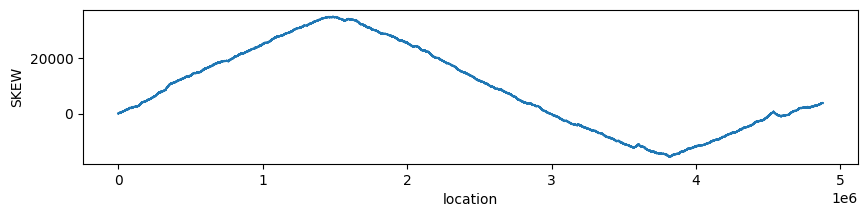

In [77]:
SKEW_dict = dict()
for i, SKEW in enumerate(getSKEW(Salmonela_entarica_genome)):
    SKEW_dict[i+1] = SKEW

import matplotlib.pyplot as plt
import seaborn as sns

SKEW_dict[0]=0

plt.figure(figsize=(10,2))
plt.xlabel('location')
plt.ylabel('SKEW')
sns.lineplot(data=SKEW_dict)
plt.show()

In [91]:
Salmonela_entarica_ori = Salmonela_entarica_genome[minSKEW(Salmonela_entarica_genome)+1:minSKEW(Salmonela_entarica_genome)+501]
Salmonela_entarica_ori

getSKEW successed~
getSKEW successed~


'GCGGTACGTTTCGGCGCAATTGGC\nATTGGCAGTCGAGAATACGACACGTTTTGCGGCGCGATTGAGAAAATAGAAGCGGAACTGAAAGGCGCTG\nGCGCAAAACAGGTTGGGGAAACACTGAAGATCAACATCCTTGAACATGAGATTCCGGAAGATCCAGCGGA\nGATTTGGCTCGGATCCTGGATTAATTTACTCAAATAAGTGTAAAGATCGTGCGATCTATTGTGGATAAAT\nATGGTGAAAAGCTTGGATCAACCGGTAGTTATCCAAAGAATAACCTTTGTTCACTTTTTGAGTTGTGTAT\nAAGTACCCGTTTTGATCCCAGCTTATACGGGCCACGATCACCGATCATTCACAGCTAGTGATCCTTTCCA\nACGCATTGATCTTTATTACAGGATCCGGGTTATCCACAGCCTGGTGCGATCCTAATAAGAGATCACAATA\nGAACAGATCTCTAAATAAAAAGATCTTCTTTTTAATAGCCCGGATCCCG'

In [95]:
df = pd.DataFrame(FrequentWords_mismatch_HD(Salmonela_entarica_ori, 9, 1))
df['cnt'].value_counts()

cnt
1    409
2     79
3      4
Name: count, dtype: int64